# Data Analysis Interview Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_json('/Users/ultimateflexer/Desktop/Springboard/ultimate_challenge/logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df.describe()

<ipython-input-5-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


## Part 1 - Exploratory Data Analysis

In [6]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)
df_15 = df.resample("15min").sum()

In [7]:
df.head()

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [8]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


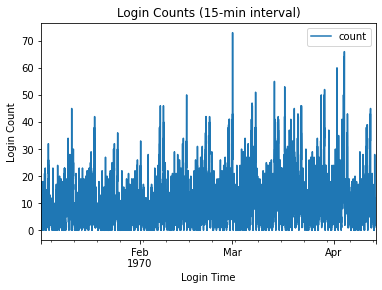

In [9]:
df_15.plot()
plt.title('Login Counts (15-min interval)')
plt.xlabel('Login Time')
plt.ylabel('Login Count')
plt.show()

This graph is not easy to interpret at first glance. It might be better to observe the logins at different time intervals in order to better visualize trends.

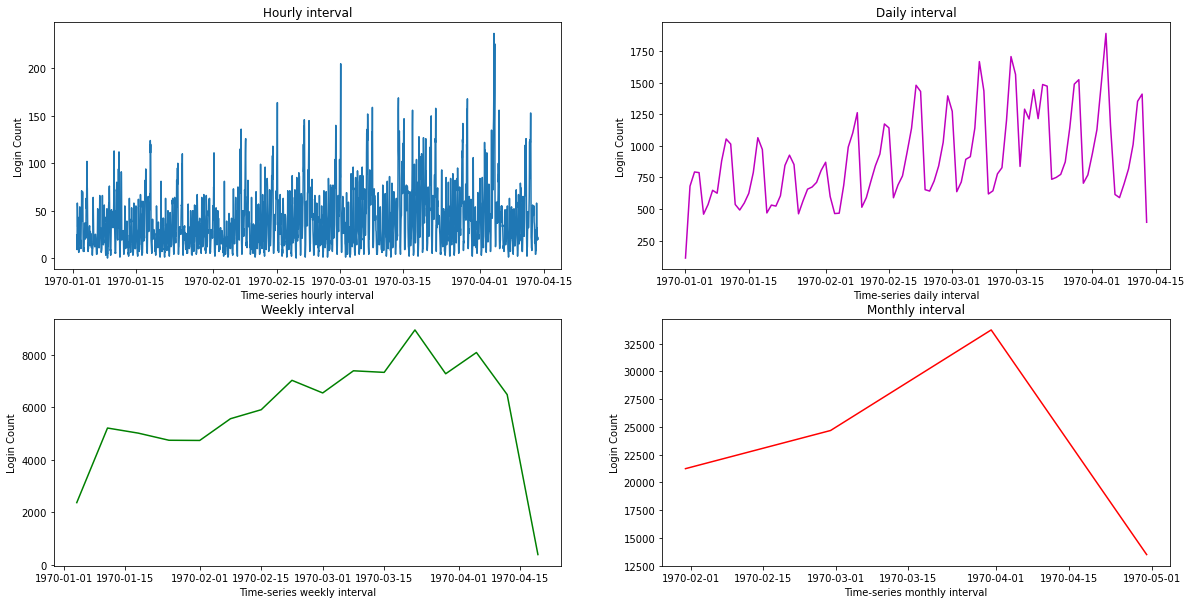

In [10]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));

# 60-min interval
ax1.plot(df.resample('60T').sum());
ax1.set(xlabel='Time-series hourly interval', ylabel='Login Count', title='Hourly interval');

# Daily interval
ax2.plot(df.resample('D').sum(), color='m');
ax2.set(xlabel='Time-series daily interval', ylabel='Login Count', title='Daily interval');


# Weekly interval
ax3.plot(df.resample('W').sum(), color='g');
ax3.set(xlabel='Time-series weekly interval', ylabel='Login Count', title='Weekly interval');

# Monthly interval
ax4.plot(df.resample('M').sum(), color='r');
ax4.set(xlabel='Time-series monthly interval', ylabel='Login Count', title='Monthly interval');

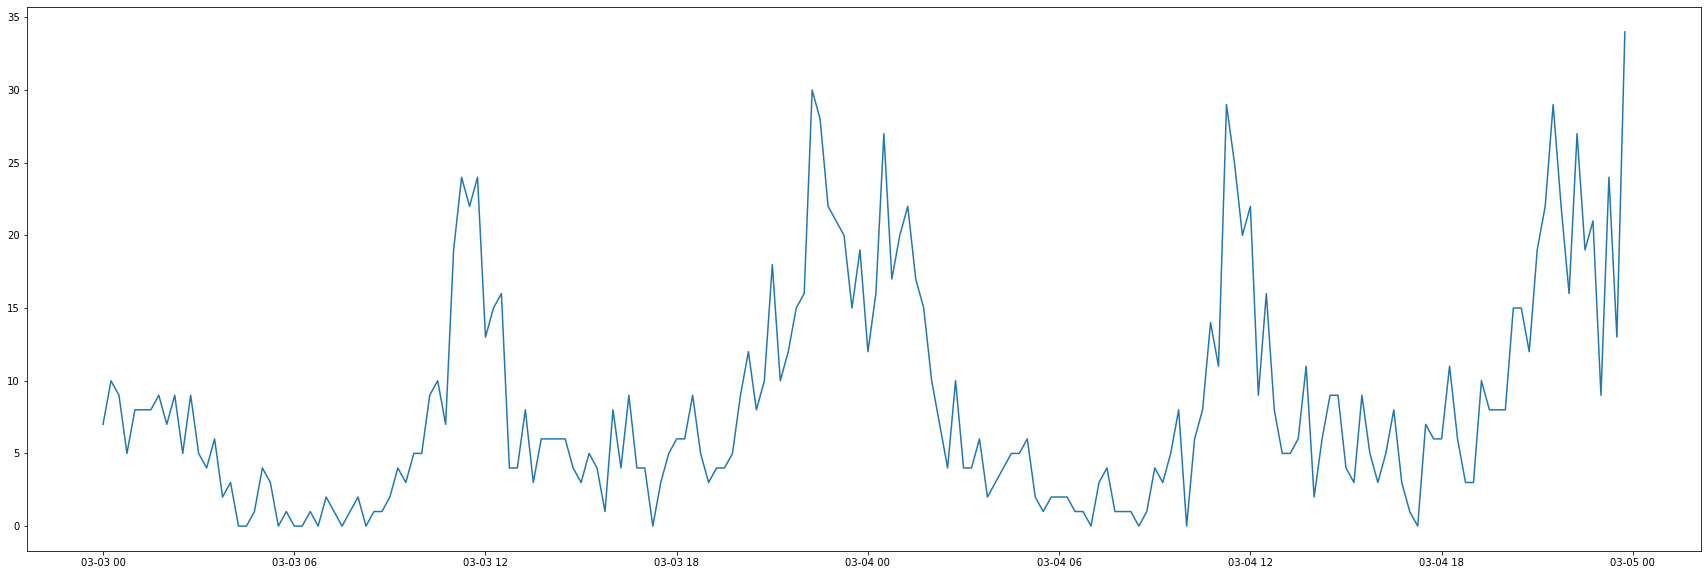

In [11]:
# Let's now observe the daily interval cycle pattern.

plt.figure(figsize=(30,10));
plt.plot(df_15 .loc['1970-03-03':'1970-03-04' ])

Based on the time of day, demand changes. Here it is clear that before 12:00pm and 12:00am, the demand is the highest.

## Part 2 - Experiment and Metrics Design

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Based on the data, Ultimate Gotham is most active at night while Ultimate Metropolis is most active during the day. On weekends, there is a lot of activity in both. This leads me to believe that drivers tend to spend more time driving in Gotham city during the night, and Metropolis city during the day. On weekends, since the activity in both the cities is quite high, drivers tend to be both the cities at some point in their trip. The metric I would use is the change in weekday activity. Here I would have to check if there is an increase in cars entering the bridge from Gotham during daytime hours of weekdays, and if there is an increase in cars entering the bridge from Metropolis during the night. I choose this because the records at the toll both are a good indicator of this, and it can aid in the reimbursement process.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    **A**. how you will implement the experiment
    **B**. what statistical test(s) you will conduct to verify the significance of the observation
    **C**. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

I would conduct a z-test, assuming a sample size of 30 or more drivers. Using this, I could compare the number of bridge crossings between drivers.

$h_0$: There is no difference in driver bridge crossings, given toll reimbursement implementation. 

$h_a$: There is an increase in driver bridge crossings, given toll reimbursement implementation. The null hypothesis distribution is the distribution of driver crossings before the toll reimbursement.

Calculate the z-score of the average frequency of drivers crossing from city to city, after the reimbursement implementation. Set $a$=0.05. Determine if the z-score's p-value falls below this significance threshold.

For a p-value < 0.05: the post-reimbursement crossings are so high that it's unlikely to occur under the null hypothesis. This result would display a significant increase in driver bridge crossings, indicating that the plan was successful.

The caveat here is that $a$ significance levels are set arbitrarly, and p-values fluctuate depending on the sample size. Depending on how wide of a margin the post-reimbursement increase is, our experiment could either support or reject the policy.

I would only  recommend considering the policy a success if the margin is wide enough (and p-value far below 0.05) that there is no doubt that a significant post-reimbursement increase has occurred, even if there is high fluctuation.

## Part 3 - Predictive Modeling

In [12]:
# Read in the driver data.

df_driver = pd.read_json('/Users/ultimateflexer/Desktop/Springboard/ultimate_challenge/ultimate_data_challenge.json')

In [13]:
df_driver.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [14]:
# Check out the null values.

df_driver.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [15]:
# Drop phone data, and impute missing values of 'avg_rating_of_driver' and 'avg_rating_by_driver'
# with the mean of the column. 

df_driver = df_driver.drop(df_driver[df_driver.phone.isna()==True].index, axis=0)
df_driver['avg_rating_by_driver'].fillna(df_driver.avg_rating_by_driver.mean(), inplace=True)
df_driver['avg_rating_of_driver'].fillna(df_driver.avg_rating_of_driver.mean(), inplace=True)
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [16]:
# Convert 'last_trip_date' column from object type to datetime

df_driver['last_trip_date'] = pd.to_datetime(df_driver['last_trip_date'])

# Set current date 

current_date = df_driver['last_trip_date'].max()

In [17]:
# Find active users

df_driver['active'] = df_driver['last_trip_date'].apply(lambda date: 0 if (current_date-date).days > 30 else 1)
df_driver.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
6,Astapor,1,2014-01-24,4.601467,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,2014-01-21,4.500000,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0
9,Winterfell,1,2014-01-03,4.601467,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,0


In [18]:
df_driver['active'].value_counts()

0    30933
1    18671
Name: active, dtype: int64

In [19]:
print('About', 18671/49604 *100, '% of drivers are active by the sixth month.')

About 37.640109668575114 % of drivers are active by the sixth month.


I will use the Random Forest Classifier here, due to it's powerful predictive skills, as well as it's ability to determine important features.

In [20]:
# One-hot encode the categorical features.
df_driver_features = pd.get_dummies(df_driver, columns=['city', 'phone', 'ultimate_black_user'])
df_driver_features.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


In [21]:
#  Create y and remove unimportant features, as well as the target feature.

y = df_driver_features['active']
df_driver_features = df_driver_features.drop(['last_trip_date','signup_date','active'],axis=1)

### Modeling

#### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [23]:
# Create X by scaling the data.

scaler = QuantileTransformer()
X = scaler.fit_transform(df_driver_features)

In [24]:
# Split data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [25]:
# Build random forest model with 1000 estimators.

randf = RandomForestClassifier(n_estimators=1000)
randf.fit(X_train, y_train)
y_pred = randf.predict(X_test)

In [26]:
# Check performance.

randf.score(X_test, y_test)

0.753326344649625

In [27]:
cv_score = cross_val_score(randf, X_test, np.ravel(y_test), cv=5)
print('Mean Cross Validated Score:', np.mean(cv_score))

Mean Cross Validated Score: 0.7542126613878379


In [29]:
df_importance = pd.DataFrame(zip(list(df_driver_features.columns), randf.feature_importances_),
                             index=range(df_driver_features.columns.shape[0]),
                             columns=['feature','importance'])
df_importance.sort_values(by='importance', ascending=False)

,feature,importance
5,avg_dist,0.299597
4,weekday_pct,0.132963
6,avg_rating_by_driver,0.112940
1,avg_rating_of_driver,0.082226
0,trips_in_first_30_days,0.079922
3,surge_pct,0.079748
2,avg_surge,0.066846
8,city_King's Landing,0.045927
10,phone_Android,0.020191
11,phone_iPhone,0.019062


Average distance, ratings, and trips rank among the top 5 here, while phone, city, and ultimate black user statistics rank amongst the lower 5.

In [30]:
# Generate confusion matrix.

confusion_matrix(y_test, y_pred)

array([[6226, 1524],
       [1535, 3116]])

#### Logistic Regression with Grid Search

In [31]:
# Initialize the model.

logreg = LogisticRegression(solver='lbfgs')

# Set the parameter grid.

param_grid = {'C':np.arange(0.5,5.1,0.1)}

# Instantiate and fit the grid search object.

grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [36]:
grid.best_estimator_.C

4.799999999999999

In [37]:
#Find the coefficients from Logistic Regression.

logreg_coef = LogisticRegression(C=grid.best_estimator_.C)
logreg_coef.fit(X_train, y_train)
df_coef = pd.DataFrame(zip(list(df_driver_features.columns), logreg_coef.coef_[0]),
                       index=range(df_driver_features.columns.shape[0]),
                       columns=['feature','coefficient'])
df_coef.head(10)

,feature,coefficient
0,trips_in_first_30_days,0.121798
1,avg_rating_of_driver,-0.333058
2,avg_surge,2.500181
3,surge_pct,-1.425130
4,weekday_pct,-0.254801
5,avg_dist,0.142976
6,avg_rating_by_driver,-1.338082
7,city_Astapor,-0.764519
8,city_King's Landing,1.111082
9,city_Winterfell,-0.245637


In [38]:
print(np.mean(cross_val_score(grid, X_test, np.ravel(y_test), cv=5)))

0.7469564171574937


The models performed just about the same, so nothing was necessarily gained through the logistic regression classifier. I have built a predictive model with 75% accuracy, which will be very useful for perdictions. The random forest model has given us the most important features while logistic regression shows us the impacts these features have. Looking at the three most important features, we can observe the following effects on the activity of a rider after six months.

'avg_dist' (*average distance*): This one is a little misleading. This is because the logistic regression model shows that an increase in average distance per trip within the first 30 days increases our chances of being an active user, but the mean of 'avg_dist' is larger for inactive riders, rather than the active ones. Due to this ambiguity, it would not be advised to increase the distance of trips taken in the first 30 days. 

'weekday_pct' (*weekday percentage*): The chance of being an active user decreases as the percentage of week day driving increases. From this, we can see that  people should be encouraged to use the app on the weekend.

'avg_rating_by_driver' (*average rating by driver*): As the rating increases, the likeliness of being an active user decreases.

'trips_in_first_30_days': As the number of trips increases, so does the likelihood of a rider being active after 6 months.

Based on the insights gained from the model, there are multiple recomendations that can be made for the company. The first is to offer incentive to riders to use the app on the weekends. The second is to offer incentive to riders to take more trips during their first 30 days using the app. The third is to encourage drivers to be genuinely honest about the ratings they give to users. Using these recommendations, the company can increase the chance of users being more active in the long run, and therefore generate more revenue.